# 미세먼지 수치 시각화 (4월 한달)

- https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123 
- 출처 : 에어코리아 -> 통계정보 -> 확정자료 다운로드 -> 최종확정자료 연도별 다운로드 -> 2021년 
- 1월~7월까지 자료 있음

## 측정항목
- SO2 = 산소포화량	
- CO  = 일산화탄소
- O3 = 오존	
- NO2 = 이산화질소	
- PM10 = 미세먼지	
- PM25 = 초미세먼지

### 목표
- 미세먼지가 월마다 차이가 있는지 확인
- 미세먼지가 지역별로 차이가 있는지 확인

#### 그 외의 내용
- 지역별로 총 한달간의 평균을 구하기

# 라이브러리, 데이터 로드하기

In [1]:
# 라이브러리 로드하기
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [3]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

## 4월 한달 미세먼지

In [4]:
# 파일 로드
df = pd.read_csv("Data/2021.04_미세먼지.csv",encoding="cp949",sep=",") # ,로 구분되어 있기때문에 이렇게 지정해주어야함
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15


In [5]:
# 요약 
df.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,427308.000000,4.273080e+05,408378.000000,405405.000000,407527.000000,408144.000000,410622.000000,409986.000000
mean,376614.356708,2.021042e+09,0.002934,0.382490,0.042666,0.015211,41.813549,17.413192
std,229697.307469,8.655847e+02,0.001835,0.149839,0.018376,0.011979,28.747922,10.594976
min,111121.000000,2.021040e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131584.000000,2.021041e+09,0.002000,0.300000,0.031000,0.007000,24.000000,10.000000
50%,336223.000000,2.021042e+09,0.003000,0.400000,0.043000,0.011000,36.000000,15.000000
75%,534463.000000,2.021042e+09,0.003000,0.500000,0.054000,0.020000,52.000000,23.000000
max,831495.000000,2.021043e+09,0.161000,5.300000,0.176000,0.155000,615.000000,440.000000


## 데이터 전처리 하기

### 측정일시 년,월,일로 나누기

### datetime 라이브러리 사용하기

- 날짜를 변경하는 이유 : 날짜 형태가 숫자로 되어있는데 날짜별로 미세먼지의 수치를 수치화하기 위해서 날짜를 나누어야 한다.

1. df_time에 날짜가 들어있는 df["측정일시"]를 넣는다.
2. str 문자로 변경한다.
3. 뒤에 0000을 더해준다. (문자 더하기)
4. 24시는 오류가 뜨기 때문에 240000을 000000으로 바꾸어준다.
5. datetime / strftime을 이용한다.

### str(df_time)을 사용하면 안되는 이유

- str(df_time)은 행 전체를 문자로 변환해 준다.
- 예). df_time = ("123", "456", "789", "012") 이렇게 있으면 -> "123456789012" 이렇게 통째로 문자열이 되어버린다.

In [6]:
# 측정일시 df_time 변수에 따로 담아주기 1
df_time = df["측정일시"]
df_time

0         2021040101
1         2021040102
2         2021040103
3         2021040104
4         2021040105
             ...    
427303    2021043020
427304    2021043021
427305    2021043022
427306    2021043023
427307    2021043024
Name: 측정일시, Length: 427308, dtype: int64

In [7]:
# df_time 문자로 변환해주기 2 
df_time= df_time.astype('str')
df_time

0         2021040101
1         2021040102
2         2021040103
3         2021040104
4         2021040105
             ...    
427303    2021043020
427304    2021043021
427305    2021043022
427306    2021043023
427307    2021043024
Name: 측정일시, Length: 427308, dtype: object

In [8]:
# 뒤에 000붙여주기

time = '0000'
df_time = df_time + time
df_time

0         20210401010000
1         20210401020000
2         20210401030000
3         20210401040000
4         20210401050000
               ...      
427303    20210430200000
427304    20210430210000
427305    20210430220000
427306    20210430230000
427307    20210430240000
Name: 측정일시, Length: 427308, dtype: object

In [9]:
# 24시를 00시로 바꾸어 주기
df_time = df_time.str.replace('240000','000000')
df_time

0         20210401010000
1         20210401020000
2         20210401030000
3         20210401040000
4         20210401050000
               ...      
427303    20210430200000
427304    20210430210000
427305    20210430220000
427306    20210430230000
427307    20210430000000
Name: 측정일시, Length: 427308, dtype: object

In [10]:
#import pandas as pd
#import numpy as np
import datetime

df['date'] = pd.to_datetime(df_time).dt.strftime('%Y-%m-%d-%H시')
df[['date']]

,date
0,2021-04-01-01시
1,2021-04-01-02시
2,2021-04-01-03시
3,2021-04-01-04시
4,2021-04-01-05시
...,...
427303,2021-04-30-20시
427304,2021-04-30-21시
427305,2021-04-30-22시
427306,2021-04-30-23시


In [11]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15,2021-04-01-01시
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15,2021-04-01-02시
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15,2021-04-01-03시
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15,2021-04-01-04시
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15,2021-04-01-05시


In [12]:
# 지역을 확인하기 위해 출력
df_region = df["지역"]
df_region.unique()

array(['서울 중구', '서울 용산구', '서울 종로구', '서울 광진구', '서울 성동구', '서울 중랑구',
       '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구',
       '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구',
       '서울 서초구', '서울 송파구', '서울 강동구', '서울 금천구', '서울 강북구', '서울 양천구',
       '서울 노원구', '경기 수원시', '경기 성남시', '경기 의정부시', '경기 안양시', '경기 광명시',
       '경기 안산시', '경기 과천시', '경기 구리시', '경기 의왕시', '경기 시흥시', '경기 남양주시',
       '경기 평택시', '경기 파주시', '경기 고양시', '경기 광주시', '경기 용인시', '경기 이천시',
       '경기 포천시', '경기 김포시', '경기 군포시', '경기 오산시', '경기 하남시', '경기 화성시',
       '경기 양주시', '경기 동두천시', '경기 안성시', '경기 여주시', '경기 연천군', '경기 가평군',
       '경기 양평군', '강원 춘천시', '강원 양구군', '강원 동해시', '강원 철원군', '강원 화천군',
       '강원 인제군', '강원 고성군', '부산 중구', '부산 동구', '부산 영도구', '부산 부산진구',
       '부산 동래구', '부산 남구', '부산 사상구', '부산 북구', '부산 금정구', '부산 해운대구',
       '부산 사하구', '부산 강서구', '부산 연제구', '부산 기장군', '부산 수영구', '부산 서구',
       '경남 창원시', '울산 동구', '울산 중구', '울산 남구', '울산 울주군', '울산 북구', '경남 진주시',
       '경남 하동군', '경남 김해시', '경남 거제시', '경남 사천시', '경남 양산시

In [13]:
# 서울이 들어간 지역만 뽑아서 넣기
df_region = df.loc[df["지역"].str.contains("서울"),"지역"].copy()
df_region = df_region.unique()
df_region

array(['서울 중구', '서울 용산구', '서울 종로구', '서울 광진구', '서울 성동구', '서울 중랑구',
       '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구',
       '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구',
       '서울 서초구', '서울 송파구', '서울 강동구', '서울 금천구', '서울 강북구', '서울 양천구',
       '서울 노원구'], dtype=object)

In [39]:
# df["date"]의 값을 df_day에 넣어서 문자로 변경해주어야 split사용가능
df_day = df["date"]
df_day= df_day.astype('str')
df_day

0         2021-04-01-01시
1         2021-04-01-02시
2         2021-04-01-03시
3         2021-04-01-04시
4         2021-04-01-05시
               ...      
427303    2021-04-30-20시
427304    2021-04-30-21시
427305    2021-04-30-22시
427306    2021-04-30-23시
427307    2021-04-30-00시
Name: date, Length: 427308, dtype: object

In [19]:
# 일별 분리해주는 함수
def parse_day(date):
    day = date.split("-")[2]
    day = int(day)
    return day
y = parse_day(date)
y

NameError: name 'date' is not defined

In [54]:
# 시간 따로 분리해주는 함수
def parse_time(date):
    time = date.split("-")[3]
    # time = int(time)
    return time
y = parse_time(date)
y

NameError: name 'date' is not defined

In [55]:
# 월별 따로 분리해주는 함수
def parse_month(date):
    
    month = date.split("-")[1]
    # month = int(month)
    
    return month
y = parse_month(month)
y

NameError: name 'month' is not defined

In [43]:
str(df_day).split("-")[1]

'04'

In [22]:
# 년도별 따로 분리해주는 함수
def parse_year(date):
    year = date.split("-")[0]
    # time = int(time)
    return year
y = parse_year(date)
y

NameError: name 'date' is not defined

In [23]:
# 일만 넣기 -> 일별로 평균을 구해서 도표그릴 예정
df["일"] = df["date"].apply(parse_day)
df["일"]

0          1
1          1
2          1
3          1
4          1
          ..
427303    30
427304    30
427305    30
427306    30
427307    30
Name: 일, Length: 427308, dtype: int64

In [50]:
# 시간만 넣기 -> 시간별로 평균을 구해서 도표그릴 예정
df["시간"] = df["date"].apply(parse_time)
df["시간"]

0         01시
1         02시
2         03시
3         04시
4         05시
         ... 
427303    20시
427304    21시
427305    22시
427306    23시
427307    00시
Name: 시간, Length: 427308, dtype: object

In [56]:
# 월별
df["월"] = df["date"].apply(parse_month)
df["월"]

0         04
1         04
2         04
3         04
4         04
          ..
427303    04
427304    04
427305    04
427306    04
427307    04
Name: 월, Length: 427308, dtype: object

In [46]:
# 년도별
df["년도"] = df["date"].apply(parse_year)
df["년도"]

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
427303    2021
427304    2021
427305    2021
427306    2021
427307    2021
Name: 년도, Length: 427308, dtype: object

In [57]:
df.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,date,일,시간,월,년도
0,서울 중구,도시대기,111121,중구,2021040101,0.003,0.6,0.003,0.057,39.0,20.0,서울 중구 덕수궁길 15,2021-04-01-01시,1,01시,04,2021
1,서울 중구,도시대기,111121,중구,2021040102,0.003,0.6,0.003,0.055,37.0,18.0,서울 중구 덕수궁길 15,2021-04-01-02시,1,02시,04,2021
2,서울 중구,도시대기,111121,중구,2021040103,0.003,0.6,0.006,0.052,41.0,23.0,서울 중구 덕수궁길 15,2021-04-01-03시,1,03시,04,2021
3,서울 중구,도시대기,111121,중구,2021040104,0.003,0.5,0.019,0.033,36.0,17.0,서울 중구 덕수궁길 15,2021-04-01-04시,1,04시,04,2021
4,서울 중구,도시대기,111121,중구,2021040105,0.003,0.5,0.018,0.033,38.0,19.0,서울 중구 덕수궁길 15,2021-04-01-05시,1,05시,04,2021


In [63]:
# 필요한 데이터만 남겨두기
columns = ["지역", "SO2", "CO", "O3", "NO2", "PM10", "PM25", "년도", "월", "일", "시간"]
df_april = df[columns].copy()
df_april.head()

,지역,SO2,CO,O3,NO2,PM10,PM25,년도,월,일,시간
0,서울 중구,0.003,0.6,0.003,0.057,39.0,20.0,2021,04,1,01시
1,서울 중구,0.003,0.6,0.003,0.055,37.0,18.0,2021,04,1,02시
2,서울 중구,0.003,0.6,0.006,0.052,41.0,23.0,2021,04,1,03시
3,서울 중구,0.003,0.5,0.019,0.033,36.0,17.0,2021,04,1,04시
4,서울 중구,0.003,0.5,0.018,0.033,38.0,19.0,2021,04,1,05시


In [61]:
# 서울중구 한달의 평균 구하기
columns = ['서울 중구', '서울 용산구', '서울 종로구', '서울 광진구', '서울 성동구', '서울 중랑구',
       '서울 동대문구', '서울 성북구', '서울 도봉구', '서울 은평구', '서울 서대문구', '서울 마포구',
       '서울 강서구', '서울 구로구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 강남구',
       '서울 서초구', '서울 송파구', '서울 강동구', '서울 금천구', '서울 강북구', '서울 양천구',
       '서울 노원구']


NameError: name 'df_april_seoul' is not defined

In [64]:
# 지역별로 평균 구하기
df_april_mean = df_april.groupby(["지역"])["PM10"].mean()
# df_april.head()
pd.DataFrame(df_april_mean)

,PM10
지역,
강원 강릉시,44.567227
강원 고성군,39.990535
강원 동해시,49.359962
강원 삼척시,34.376224
강원 속초시,39.820084
...,...
충북 제천시,41.319328
충북 증평군,41.410367
충북 진천군,41.754545


In [66]:
# 인덱스를 컬럼으로 만들기
df_april_mean = df_april_mean.reset_index()
df_april_mean.head()

,지역,PM10
0,강원 강릉시,44.567227
1,강원 고성군,39.990535
2,강원 동해시,49.359962
3,강원 삼척시,34.376224
4,강원 속초시,39.820084


## 데이터 지역별로 시각화 하기

In [67]:
# 서울 지역만 그래프로 나타내기

df_april_seoul = df_april_mean[df_april_mean["지역"].str.contains("서울")]
df_april_seoul.head()


,지역,PM10
124,서울 강남구,46.040559
125,서울 강동구,45.217179
126,서울 강북구,41.462937
127,서울 강서구,44.788624
128,서울 관악구,37.917598


<AxesSubplot:xlabel='지역'>

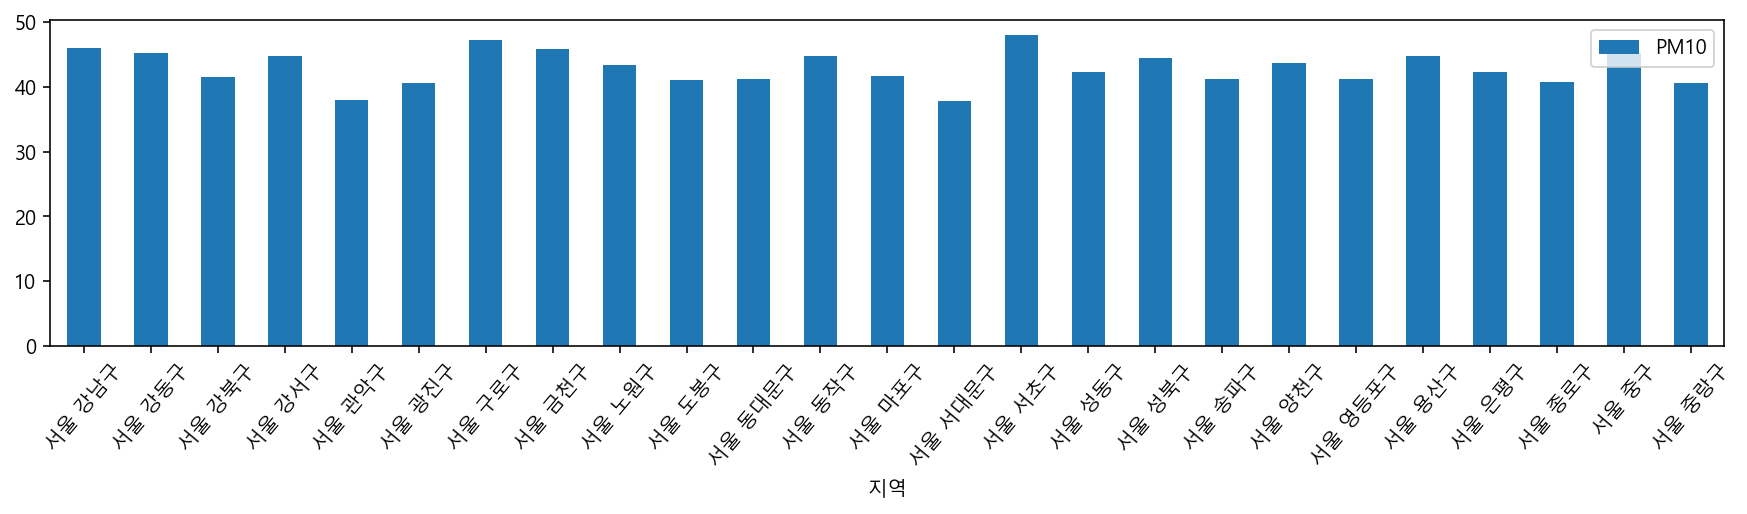

In [69]:
# 서울 그래프 그리기 

df_april_seoul.plot.bar(x="지역",rot=50,figsize=(15,3))

In [70]:
df_april_Gyeonggi = df_april_mean[df_april_mean["지역"].str.contains("경기")]
df_april_Gyeonggi.head()

,지역,PM10
18,경기 가평군,38.941590
19,경기 고양시,45.319720
20,경기 과천시,47.969525
21,경기 광명시,50.912892
22,경기 광주시,47.723485


<AxesSubplot:xlabel='지역'>

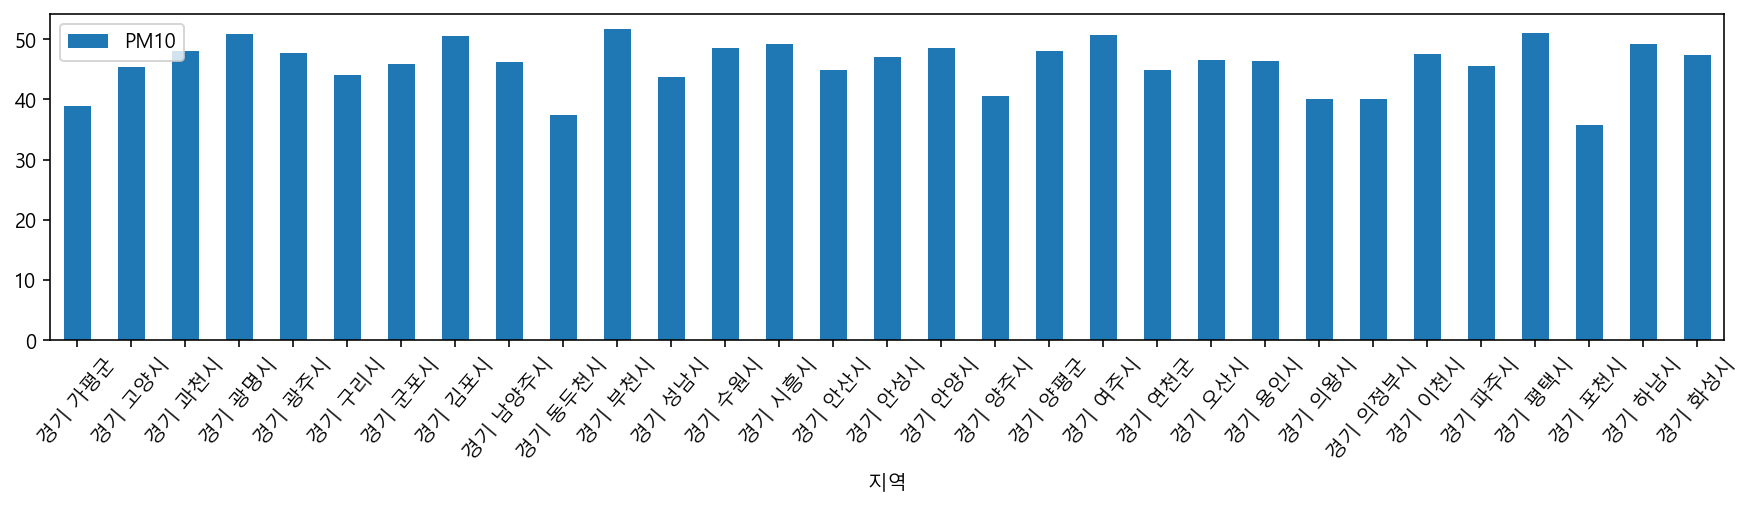

In [71]:
# 경기 그래프 그리기 

df_april_Gyeonggi.plot.bar(x="지역",rot=50,figsize=(15,3))

In [72]:
# Gangwon

df_april_Gangwon = df_april_mean[df_april_mean["지역"].str.contains("강원")]
df_april_Gangwon.head()

,지역,PM10
0,강원 강릉시,44.567227
1,강원 고성군,39.990535
2,강원 동해시,49.359962
3,강원 삼척시,34.376224
4,강원 속초시,39.820084


<AxesSubplot:xlabel='지역'>

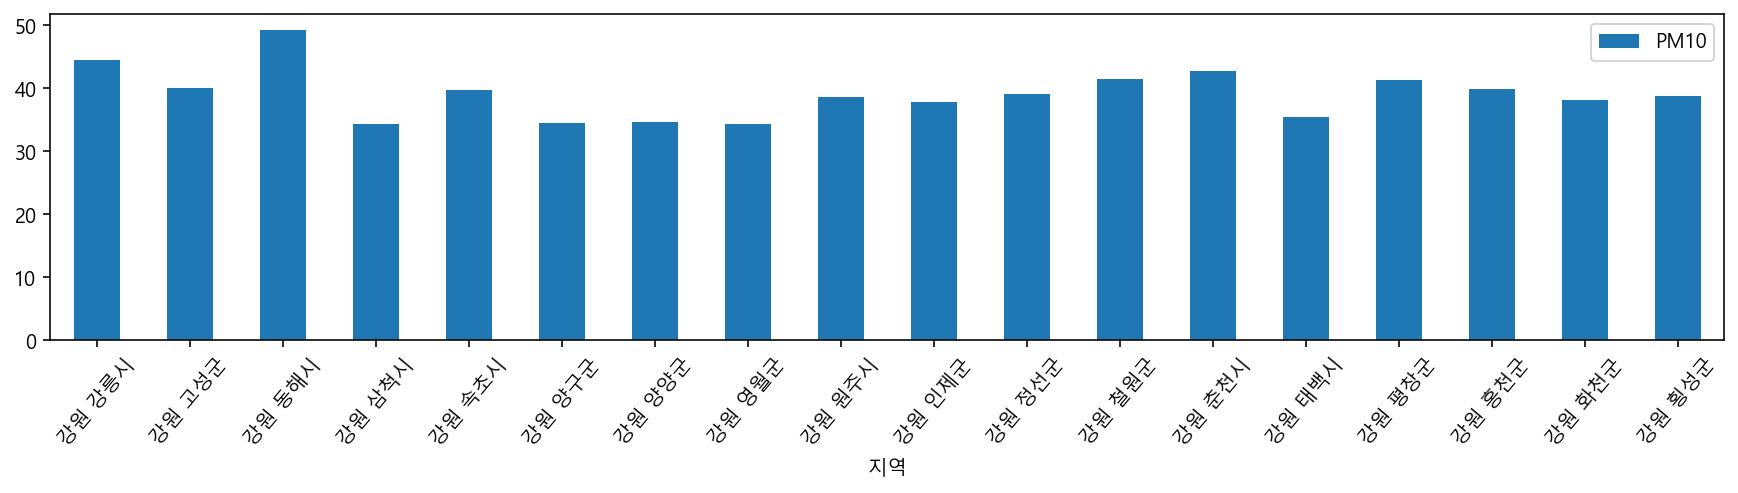

In [73]:
# 강원도 그래프 그리기 

df_april_Gangwon.plot.bar(x="지역",rot=50,figsize=(15,3))

In [74]:
# Busan

df_april_Busan = df_april_mean[df_april_mean["지역"].str.contains("부산")]
df_april_Busan.head()

,지역,PM10
108,부산 강서구,40.110670
109,부산 금정구,33.103915
110,부산 기장군,32.566996
111,부산 남구,37.708211
112,부산 동구,38.672888


<AxesSubplot:xlabel='지역'>

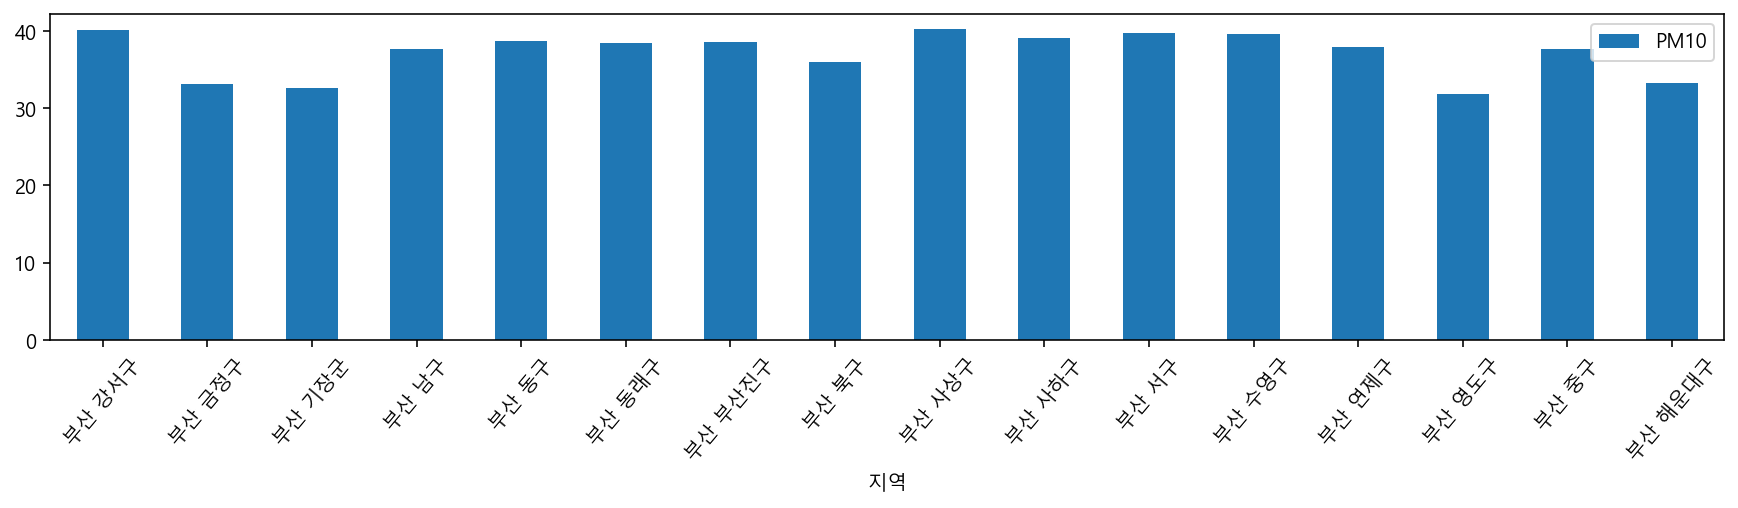

In [75]:
# 부산 그래프 그리기 

df_april_Busan.plot.bar(x="지역",rot=50,figsize=(15,3))

In [76]:
# Ulsan

df_april_Ulsan = df_april_mean[df_april_mean["지역"].str.contains("울산")]
df_april_Ulsan.head()

,지역,PM10
150,울산 남구,40.229284
151,울산 동구,36.565248
152,울산 북구,39.000698
153,울산 울주군,36.224065
154,울산 중구,35.568436


<AxesSubplot:xlabel='지역'>

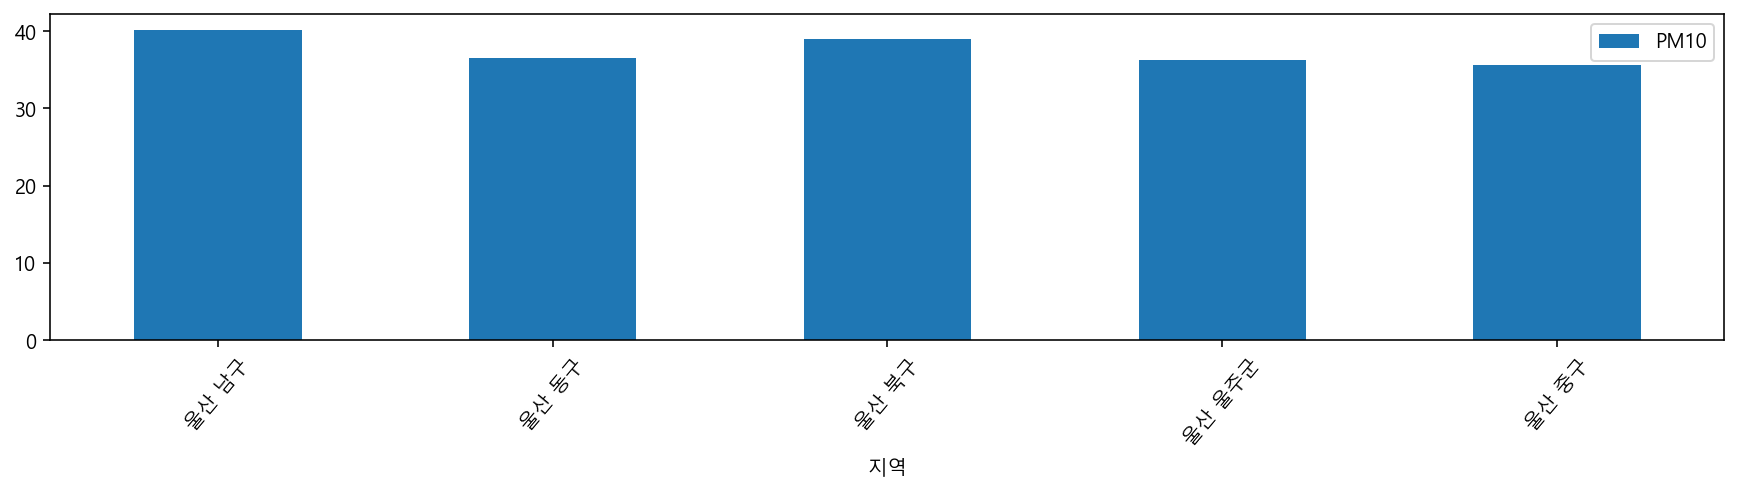

In [77]:
# 울산 그래프 그리기 

df_april_Ulsan.plot.bar(x="지역",rot=50,figsize=(15,3))

In [78]:
# Gyeongnam

df_april_Gyeongnam = df_april_mean[df_april_mean["지역"].str.contains("경남")]
df_april_Gyeongnam.head()

,지역,PM10
49,경남 거제시,31.304368
50,경남 거창군,35.905634
51,경남 고성군,33.956461
52,경남 김해시,37.178773
53,경남 남해군,36.746499


<AxesSubplot:xlabel='지역'>

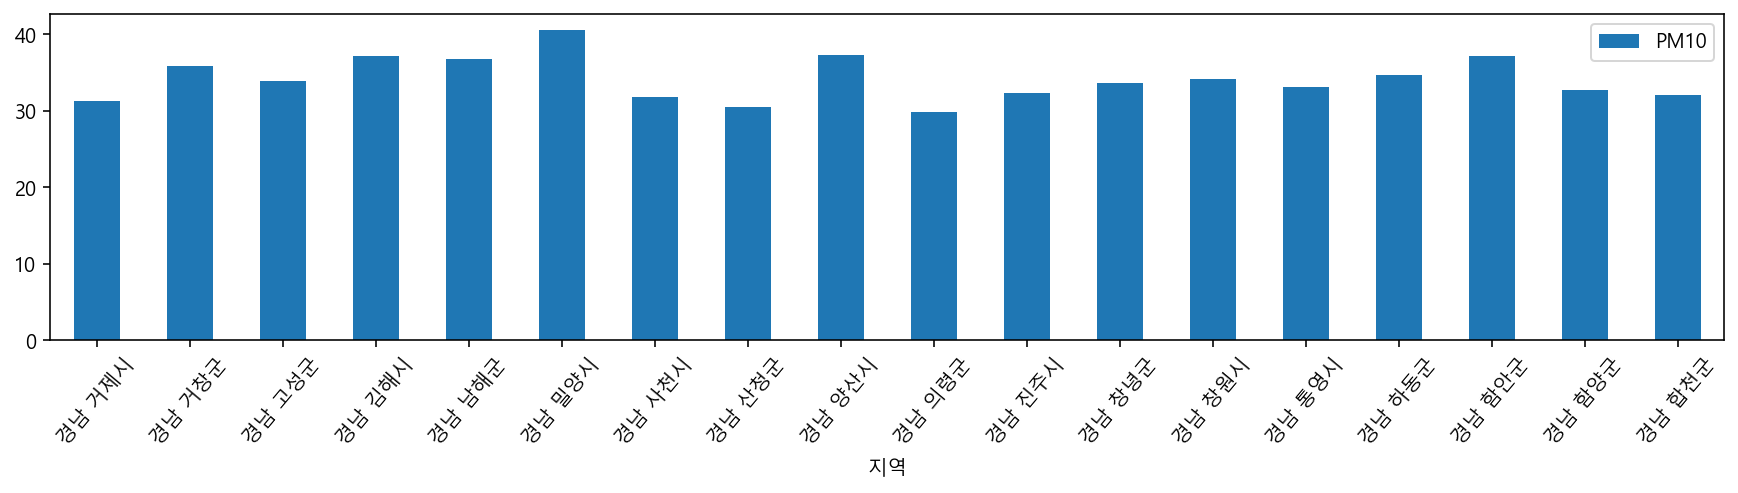

In [79]:
# 경남 그래프 그리기 

df_april_Gyeongnam.plot.bar(x="지역",rot=50,figsize=(15,3))

In [80]:
# Gwangju

df_april_Gwangju = df_april_mean[df_april_mean["지역"].str.contains("광주")]
df_april_Gwangju.head()

,지역,PM10
22,경기 광주시,47.723485
90,광주 광산구,42.434174
91,광주 남구,39.327949
92,광주 동구,36.075630
93,광주 북구,39.634764


<AxesSubplot:xlabel='지역'>

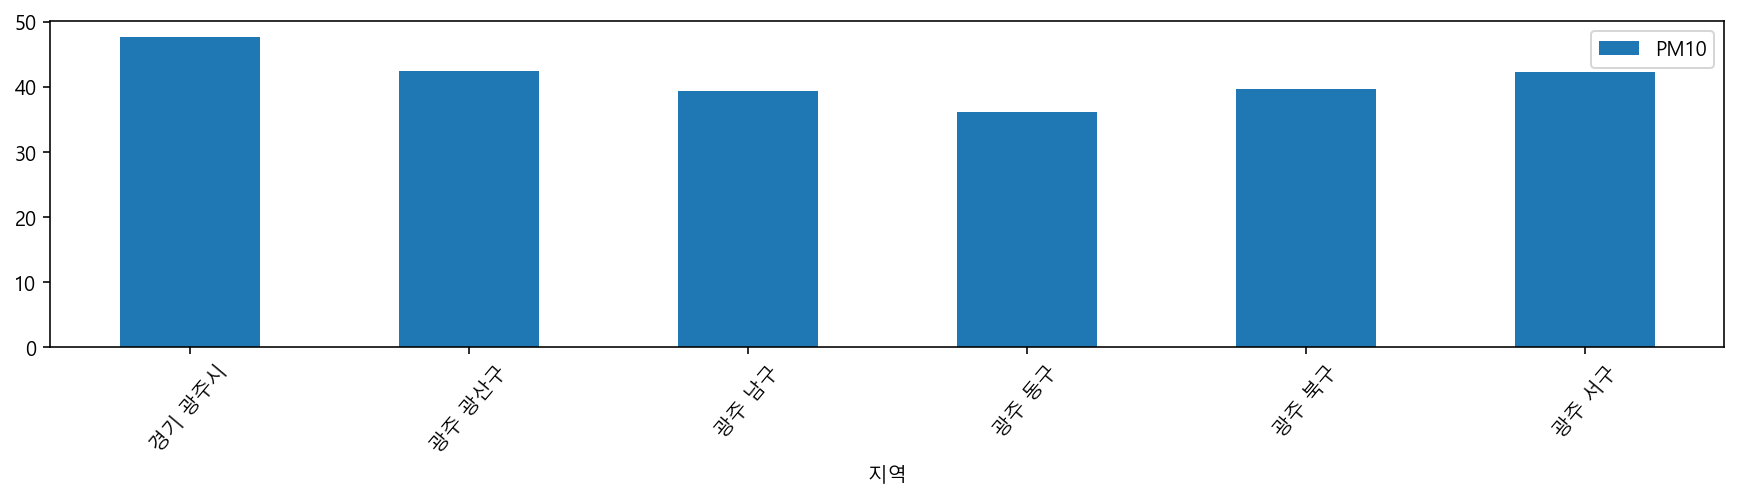

In [81]:
# 광주 그래프 그리기 

df_april_Gwangju.plot.bar(x="지역",rot=50,figsize=(15,3))

In [82]:
# Incheon

df_april_Incheon = df_april_mean[df_april_mean["지역"].str.contains("인천")]
df_april_Incheon.head()

,지역,PM10
155,인천 강화군,35.211675
156,인천 계양구,44.028860
157,인천 남동구,43.584038
158,인천 동구,43.830877
159,인천 미추홀구,43.181690


<AxesSubplot:xlabel='지역'>

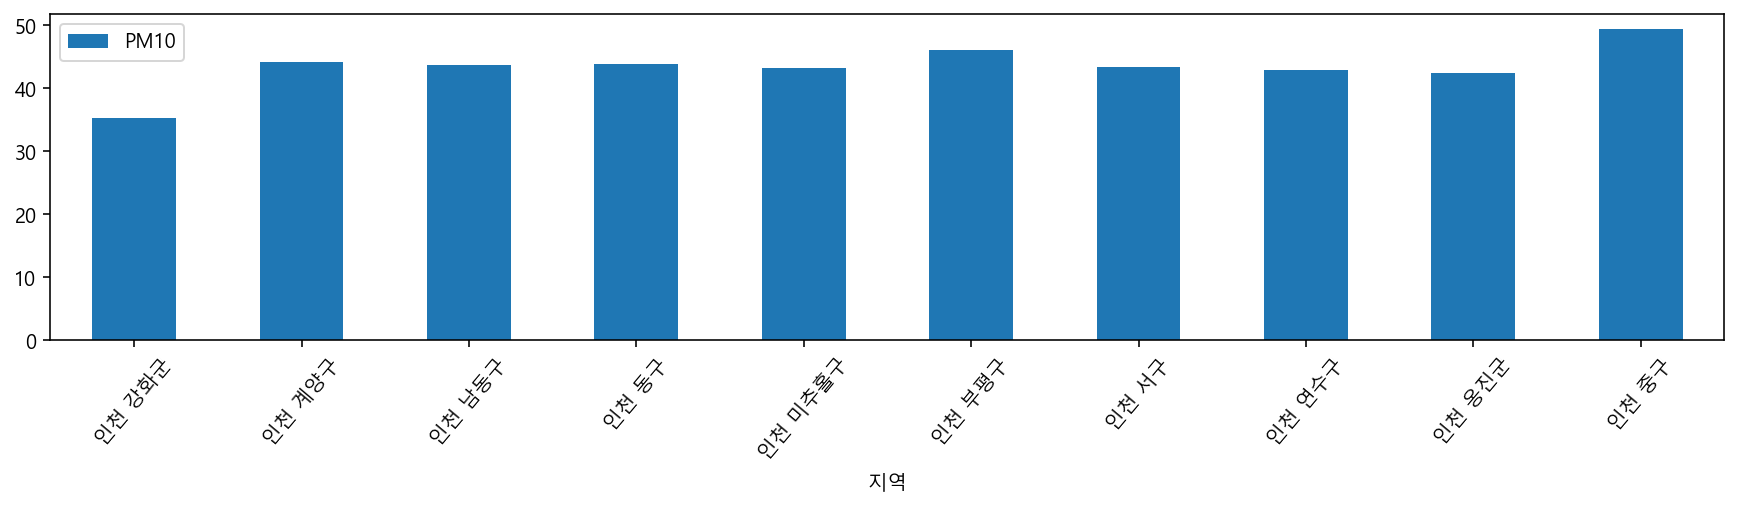

In [83]:
# 인천 그래프 그리기 

df_april_Incheon.plot.bar(x="지역",rot=50,figsize=(15,3))

In [84]:
# Gyeongbuk

df_april_Gyeongbuk = df_april_mean[df_april_mean["지역"].str.contains("경북")]
df_april_Gyeongbuk.head()

,지역,PM10
67,경북 경산시,42.871866
68,경북 경주시,39.546374
69,경북 고령군,40.577508
70,경북 구미시,44.815947
71,경북 군위군,36.853352


<AxesSubplot:xlabel='지역'>

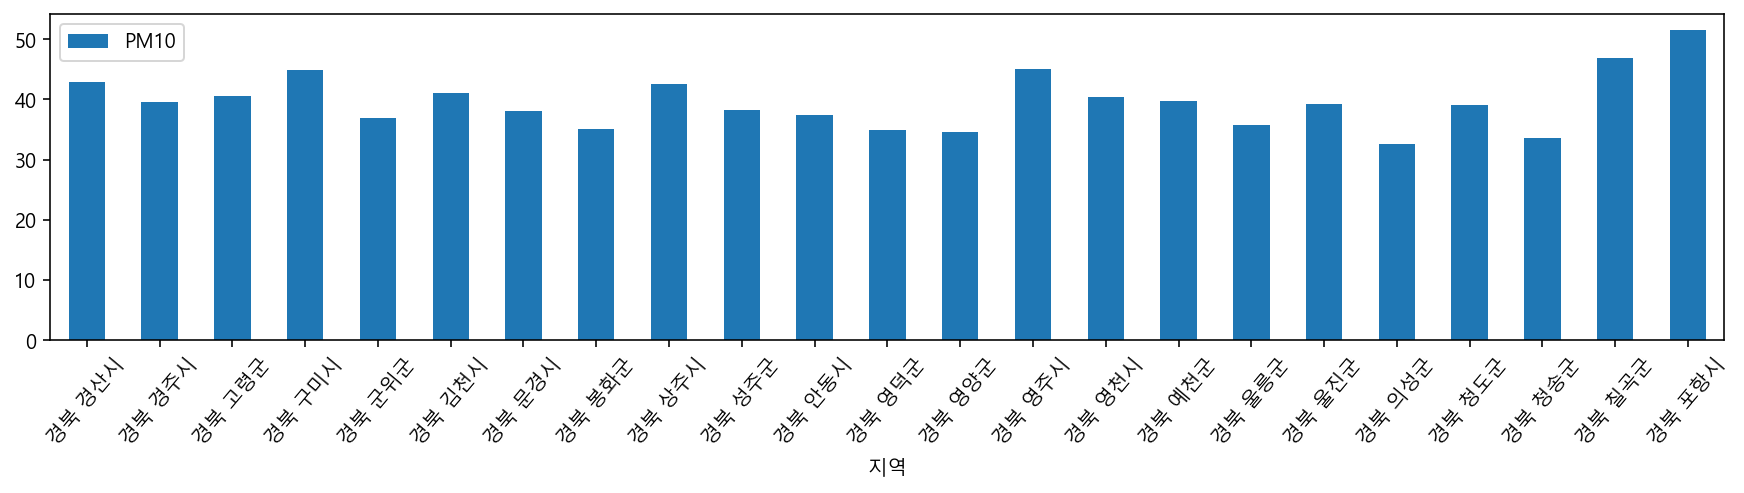

In [85]:
# 경북 그래프 그리기 

df_april_Gyeongbuk.plot.bar(x="지역",rot=50,figsize=(15,3))

In [86]:
# Daegu

df_april_Daegu = df_april_mean[df_april_mean["지역"].str.contains("대구")]
df_april_Daegu.head()

,지역,PM10
95,대구 남구,42.557300
96,대구 달서구,41.322674
97,대구 달성군,42.112269
98,대구 동구,47.118495
99,대구 북구,41.326201


<AxesSubplot:xlabel='지역'>

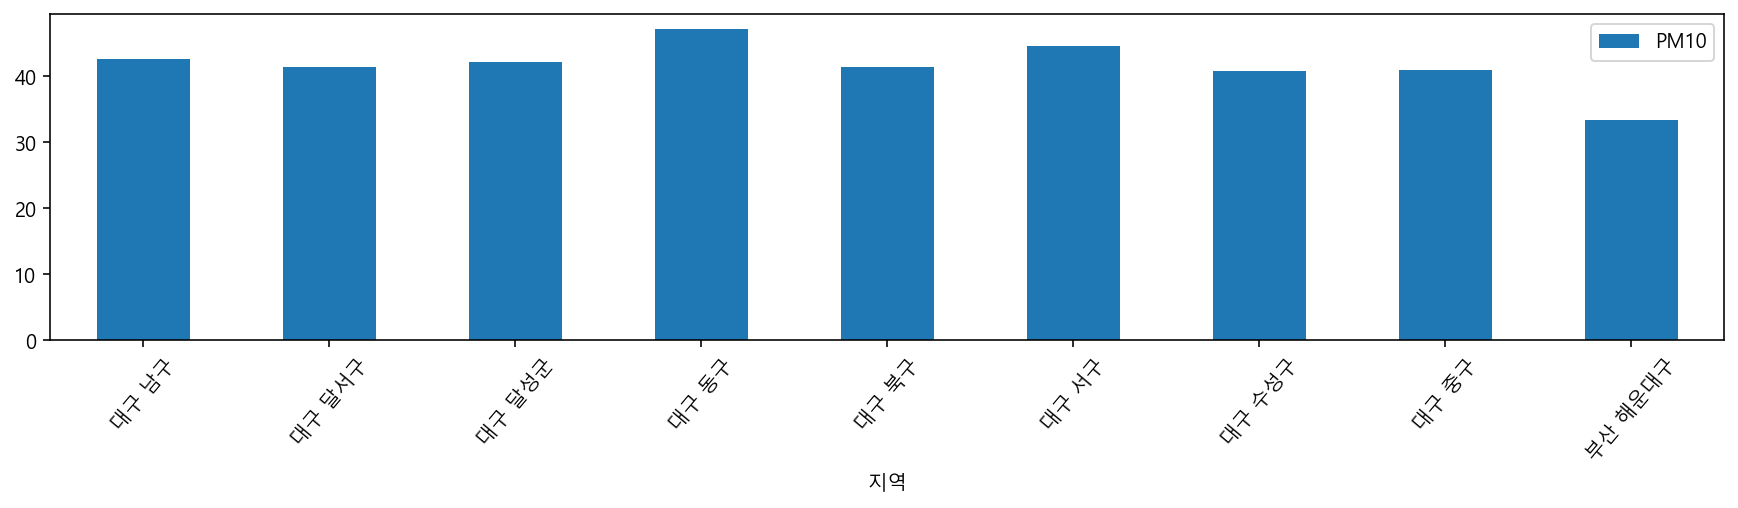

In [87]:
# 대구 그래프 그리기 

df_april_Daegu.plot.bar(x="지역",rot=50,figsize=(15,3))

In [88]:
# jeonnam

df_april_jeonnam = df_april_mean[df_april_mean["지역"].str.contains("전남")]
df_april_jeonnam.head()

,지역,PM10
165,전남 강진군,30.134266
166,전남 고흥군,31.339385
167,전남 곡성군,34.676430
168,전남 광양시,37.049732
169,전남 구례군,37.378492


<AxesSubplot:xlabel='지역'>

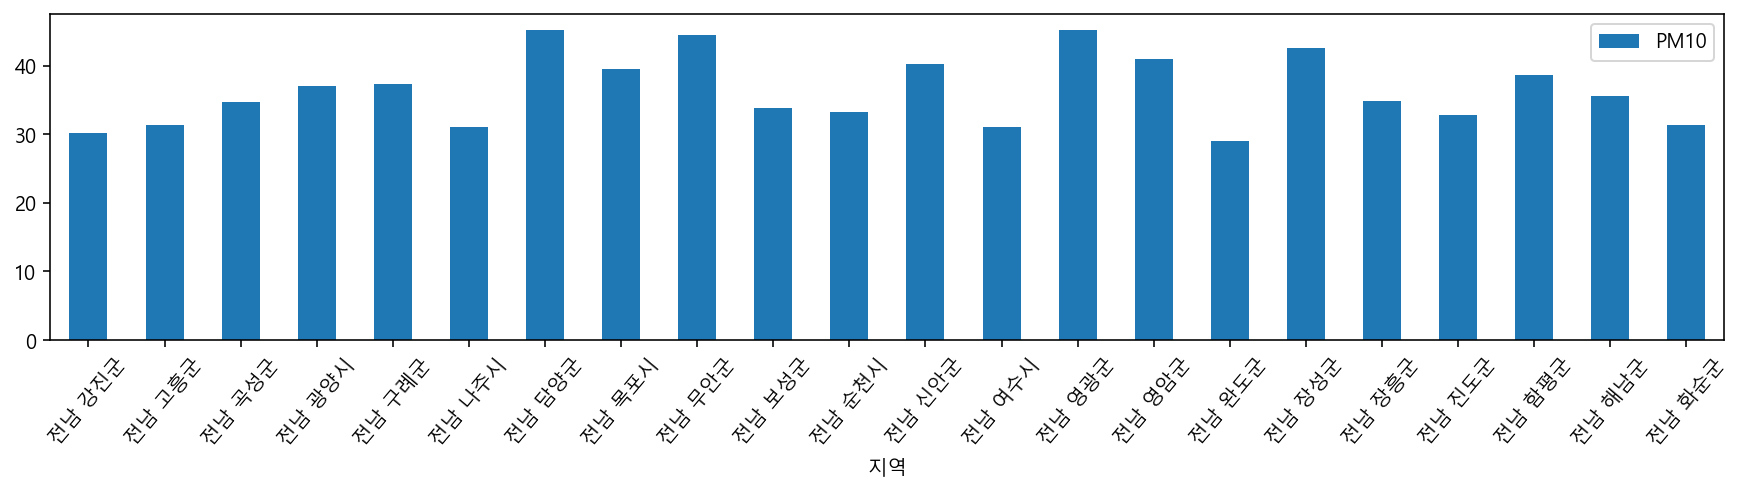

In [89]:
# 전남 그래프 그리기 

df_april_jeonnam.plot.bar(x="지역",rot=50,figsize=(15,3))

In [92]:
# Jeju

df_april_Jeju_s = df_april_mean[df_april_mean["지역"].str.contains("제주 | 세종")]
df_april_Jeju_s.head()

,지역,PM10
149,세종 세종시,41.554074
201,제주 서귀포시,35.028100
202,제주 제주시,36.969072


<AxesSubplot:xlabel='지역'>

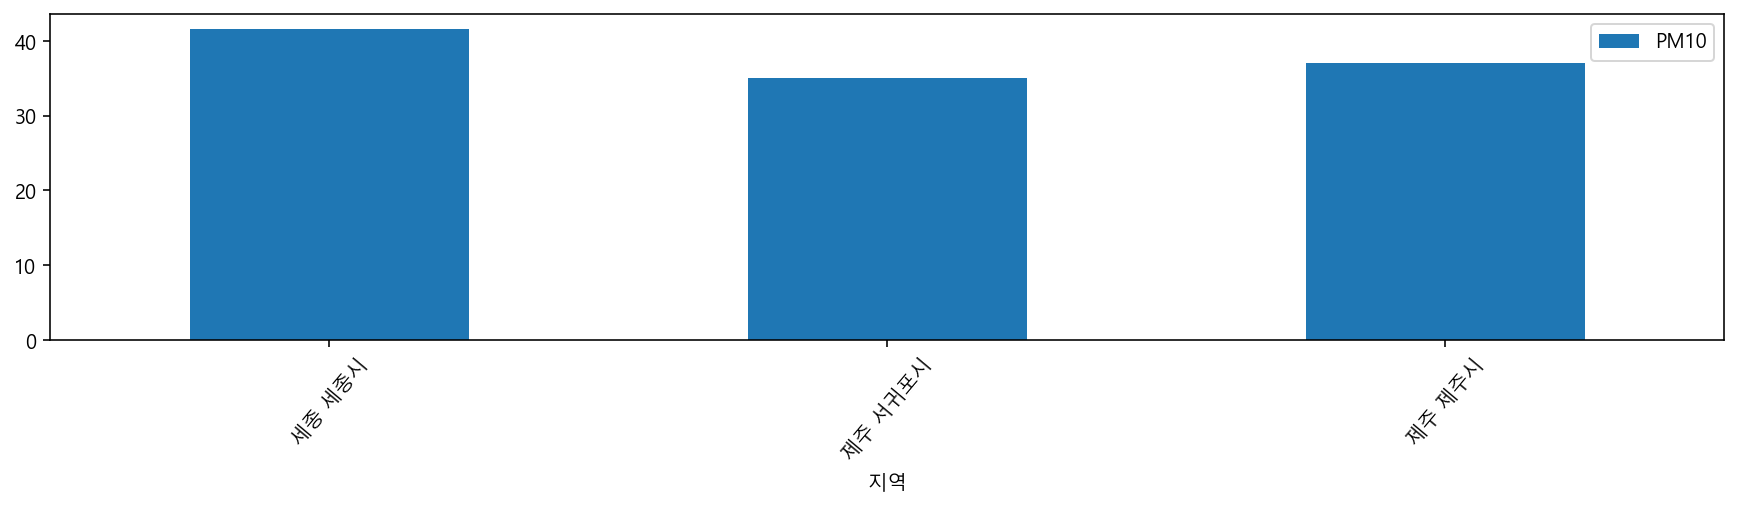

In [93]:
# 제주 그래프 그리기 

df_april_Jeju_s.plot.bar(x="지역",rot=50,figsize=(15,3))

In [94]:
# Chunggnam

df_april_Chunggnam = df_april_mean[df_april_mean["지역"].str.contains("충남")]
df_april_Chunggnam.head()

,지역,PM10
203,충남 계룡시,NaN
204,충남 공주시,45.017453
205,충남 금산군,35.793651
206,충남 논산시,41.247706
207,충남 당진시,55.938668


<AxesSubplot:xlabel='지역'>

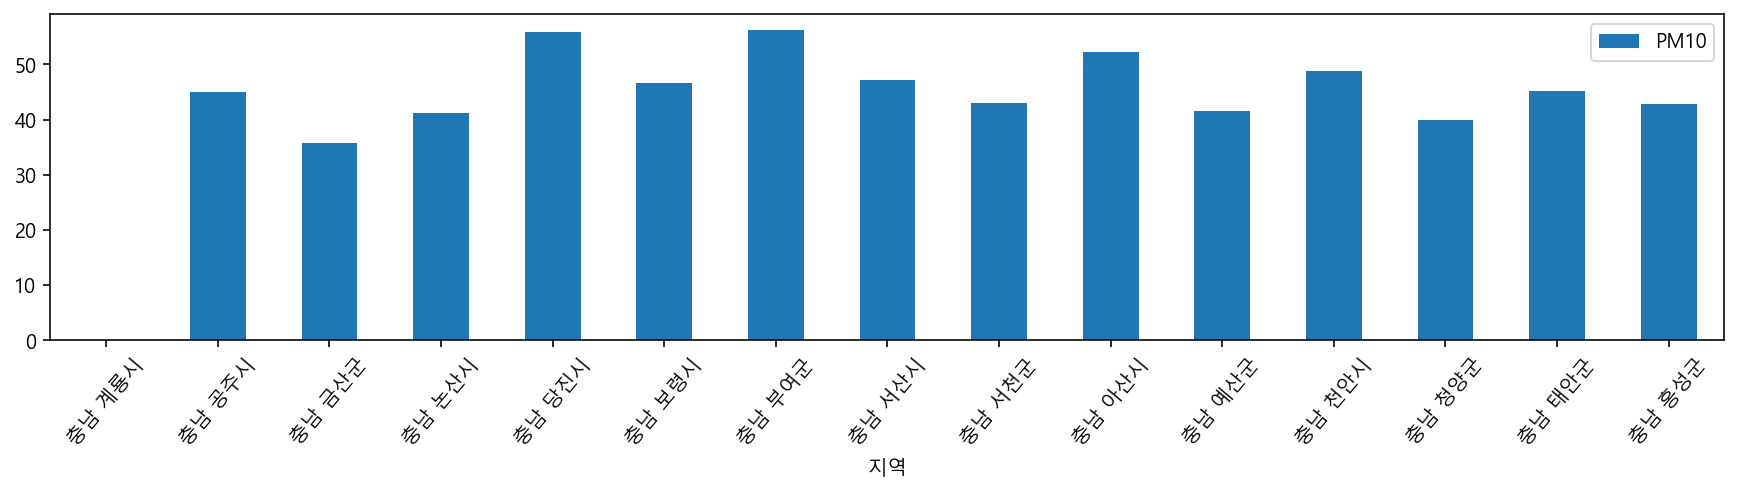

In [95]:
# 충남 그래프 그리기 

df_april_Chunggnam.plot.bar(x="지역",rot=50,figsize=(15,3))

In [96]:
# Chungbuk

df_april_Chungbuk = df_april_mean[df_april_mean["지역"].str.contains("충북")]
df_april_Chungbuk.head()

,지역,PM10
218,충북 괴산군,38.045092
219,충북 단양군,34.178805
220,충북 보은군,38.189076
221,충북 영동군,39.716084
222,충북 옥천군,39.032440


<AxesSubplot:xlabel='지역'>

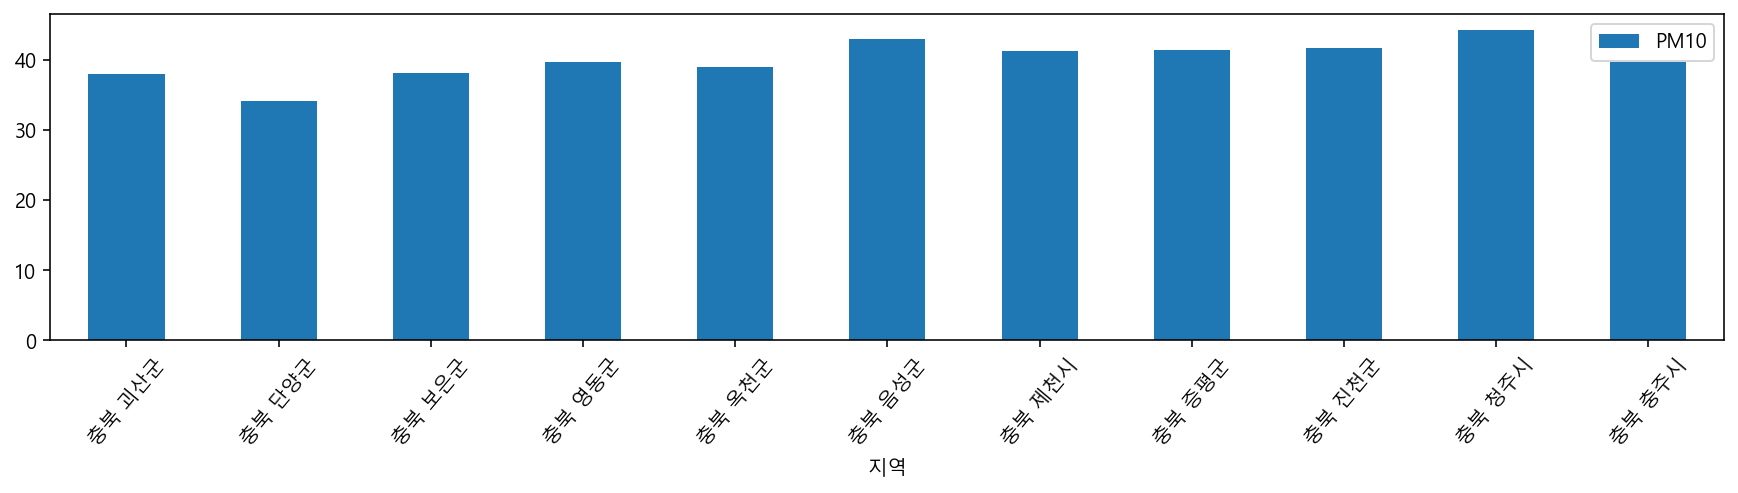

In [97]:
# 충북 그래프 그리기 

df_april_Chungbuk.plot.bar(x="지역",rot=50,figsize=(15,3))

In [98]:
# Daejeon

df_april_Daejeon = df_april_mean[df_april_mean["지역"].str.contains("대전")]
df_april_Daejeon.head()

,지역,PM10
103,대전 대덕구,45.726639
104,대전 동구,38.444989
105,대전 서구,41.201115
106,대전 유성구,39.846777
107,대전 중구,41.631211


<AxesSubplot:xlabel='지역'>

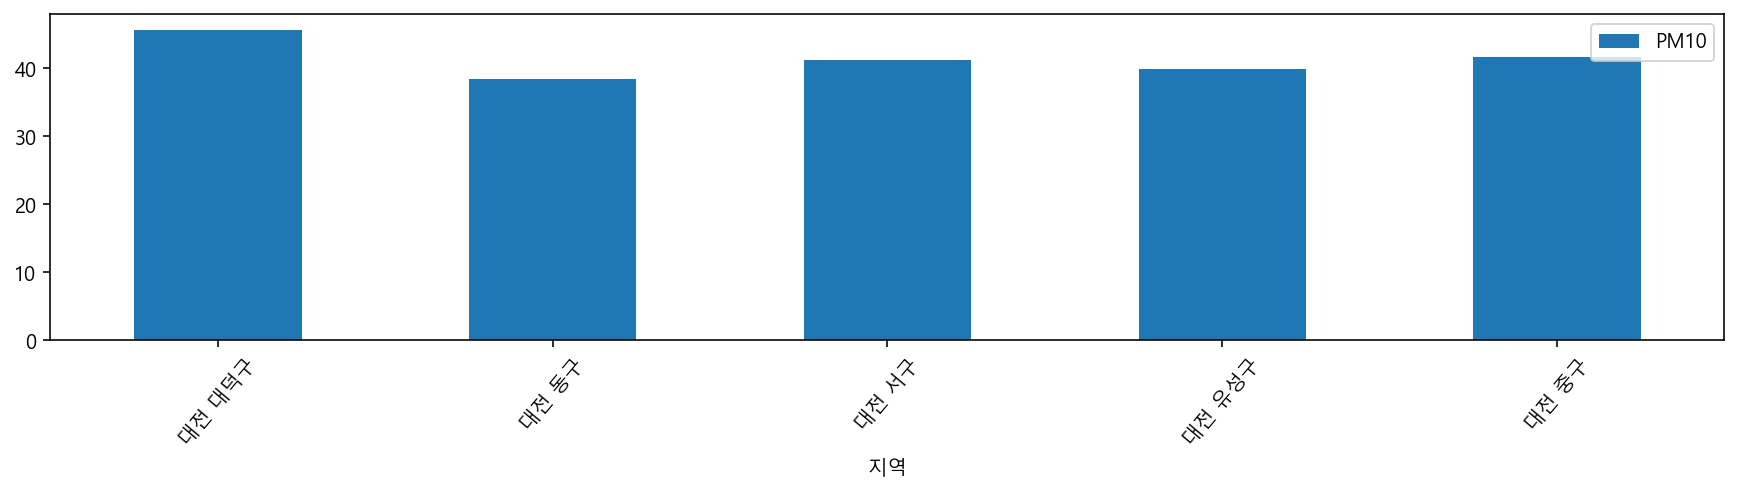

In [99]:
# 대전 그래프 그리기 

df_april_Daejeon.plot.bar(x="지역",rot=50,figsize=(15,3))